# <center> Week - 8 Assignment - Time Series Modeling 

<center> DSC-630

<center> Kalyan Pothineni

## Introduction

In this project, we will analyze historical data on monthly retail sales in the United States from January 1992 to June 2021. Retail sales data is a critical economic indicator, often used by analysts and policymakers to gauge the overall economic health of a nation, understand consumer spending patterns, and predict future economic activity. This dataset, which captures nearly three decades of retail transactions, provides a valuable view of the U.S. economy's consumer-driven sector.

The primary goal of this analysis is to develop a predictive model that can accurately forecast future monthly retail sales based on historical data. We aim to capture trends and patterns over the years by employing a linear regression model. The analysis involves visualizing the data to discern trends and seasonality, splitting the data into training and testing sets for model validation, and evaluating the model's performance using the Root Mean Square Error (RMSE) metric.

In [1]:
# Import the necessary libraries.
import pandas as pd

In [2]:
# Load the dataset from the provided CSV file
file_path = 'us_retail_sales.csv'
sales_data = pd.read_csv(file_path)

# Display the first few rows to confirm proper loading and to view the structure
sales_data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


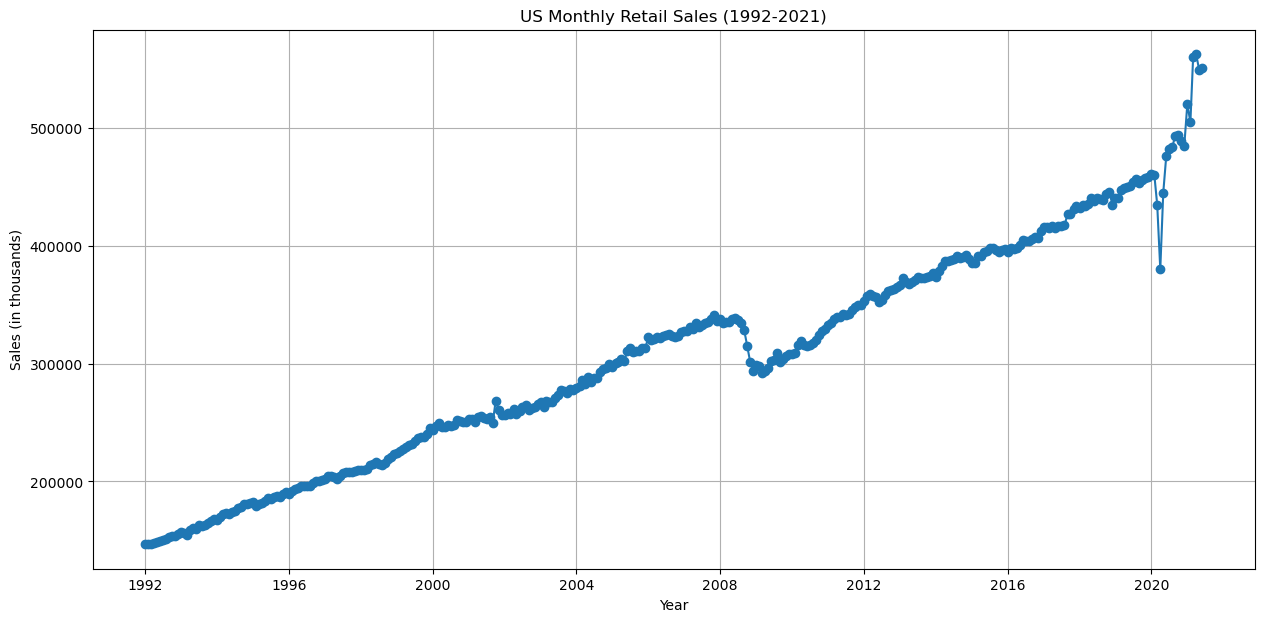

,YEAR,SALES,MONTH_NUM
count,360.000000,354.000000,360.000000
mean,2006.500000,307006.573446,6.500000
std,8.667488,94335.828235,3.456857
min,1992.000000,146805.000000,1.000000
25%,1999.000000,231402.000000,3.750000
50%,2006.500000,309534.500000,6.500000
75%,2014.000000,378193.750000,9.250000
max,2021.000000,562269.000000,12.000000


In [3]:
import matplotlib.pyplot as plt

# Convert the data into a long format for easier plotting
sales_data_long = sales_data.melt(id_vars=["YEAR"], var_name="MONTH", value_name="SALES")

# Replace abbreviated month names with numbers for sorting
month_to_num = {month: i+1 for i, month in enumerate(["JAN", "FEB", "MAR", "APR", "MAY", 
                                                      "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"])}
sales_data_long["MONTH_NUM"] = sales_data_long["MONTH"].map(month_to_num)

# Sort by year and month
sales_data_long.sort_values(by=["YEAR", "MONTH_NUM"], inplace=True)

# Create a date column
sales_data_long['DATE'] = pd.to_datetime(sales_data_long['YEAR'].astype(str) + '-' + 
                                         sales_data_long['MONTH_NUM'].astype(str))

# Plot the data
plt.figure(figsize=(15, 7))
plt.plot(sales_data_long['DATE'], sales_data_long['SALES'], marker='o', linestyle='-')
plt.title('US Monthly Retail Sales (1992-2021)')
plt.xlabel('Year')
plt.ylabel('Sales (in thousands)')
plt.grid(True)
plt.show()

# Display initial observations
sales_data_long.describe()


#### Split the dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop rows with missing values as these will interfere with our model training and predictions
sales_data_long.dropna(inplace=True)

# Prepare the data for the model
X = sales_data_long['DATE'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)  # Convert dates to ordinal for the model
y = sales_data_long['SALES'].values

# Split the data into training and testing sets
# The test set is from July 2020 to June 2021
test_start_date = pd.Timestamp(year=2020, month=7, day=1)
test_end_date = pd.Timestamp(year=2021, month=6, day=30)

# Create boolean masks for splitting
train_mask = sales_data_long['DATE'] < test_start_date
test_mask = (sales_data_long['DATE'] >= test_start_date) & (sales_data_long['DATE'] <= test_end_date)

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the sales on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Calculated rmse:",rmse)

Calculated rmse: 66429.10224837932


## Conclusion

In conclusion, our analysis of the U.S. retail sales data from 1992 to 2021 has provided valuable insights into the trends and fluctuations of the retail market over nearly three decades. The linear regression model developed for this purpose predicted monthly retail sales with an RMSE of approximately 66,429. This metric signifies the average difference between the actual sales figures and the predictions made by our model, indicating a moderate level of prediction error given the scale and variability inherent in national retail sales data.

The model's performance highlights several key points. First, it underscores the challenge of forecasting retail sales, which can influence a myriad of unpredictable factors, including economic shifts, consumer confidence, and extraordinary events like the COVID-19 pandemic. Such factors can induce significant volatility in the data, as observed in the sharp sales drop in 2020, complicating the prediction task.

Additionally, the moderate RMSE suggests room for improvement in our modeling approach. Future efforts could incorporate more complex models, such as time series analysis or machine learning techniques, which might effectively handle outliers and anomalies. Including additional predictors, such as economic indicators like unemployment rates or consumer confidence indexes, could also enhance the model's accuracy.